<a href="https://colab.research.google.com/github/jacobgreen4477/The-4th-ETRI-AI-Human-Understanding-Competition/blob/main/104_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%8B%A4%ED%97%984_v2_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> title : 제 4회 ETRI 휴먼이해 인공지능 논문경진대회 <br>
> author : hjy <br>

In our study, we used smartphones, smartwatches, sleep sensors, and self-recording apps to collect daily life logs and sleep health records of study participants in 2024.The data collection procedures and methods followed a similar approach to those used in previous studies. Here, we pu﻿blicly provide the following 12 data items, which comprise a total of 700 days' worth of lifelog data, strictly for non-commercial and academic research purposes only.
- mACStatus: Indicates whether the smartphone is currently being charged.
- mActivity: Value calculated by the Google Activity Recognition API.
- mAmbience: Ambient sound identification labels and their respective probabilities.
- mBle: Bluetooth devices around individual subject.
- mGps: Multiple GPS coordinates measured within a single minute using the smartphone.
- mLight: Ambient light measured by the smartphone.
- mScreenStatus: Indicates whether the smartphone screen is in use.
- mUsageStats: Indicates which apps were used on the smartphone and for how long.
- mWifi: Wifi devices around individual subject.
- wHr: Heart rate readings recorded by the smartwatch.
- wLight: Ambient light measured by the smartwatch.
- wPedo: Step data recorded by the smartwatch.

For the purpose of training a learning model to predict sleep health, fatigue, and stress, the following six metrics were derived from sleep sensor data and self-reported survey records. Each metric consists of values categorized into either two levels (0, 1) or three levels (0, 1, 2), depending on the specific metric. The detailed classification criteria for each metric's levels will be provided in a separate document.These
metrics assign a value of 0 for sleep records that do not meet the recommended guidelines.For instance, the first questionnaire metric (Q1) is assigned a value of 1 on days when an
individual’s self-reported sleep quality exceeds their average over the experimental period, and 0 when it
falls below that average. Similarly, the second and third metrics (Q2 and Q3) are assigned a value of 0
on days when the participant’s fatigue and stress levels, respectively, exceed their average, and a value of
1 when these levels are below average.

- Q1: Overall sleep quality as perceived by a subject immediately after waking up.
- Q2: Physical fatigue of a subject just before sleep.
- Q3: Stress level experienced by a subject just before sleep.
- S1: Adherence to sleep guidelines for total sleep time (TST).
- S2: Adherence to sleep guidelines for sleep efficiency (SE).
- S3: Adherence to sleep guidelines for sleep onset latency (SOL, or SL).

수면 건강, 피로, 스트레스 예측을 위한 학습 모델을 훈련시키기 위해, 수면 센서 데이터와 자기 보고식 설문 기록을 기반으로 다음의 6가지 지표를 도출했습니다.
각 지표는 해당 항목에 따라 두 수준(0, 1) 또는 세 수준(0, 1, 2)으로 구분된 값을 가집니다.
각 지표의 세부 분류 기준은 별도의 문서에서 제공될 예정입니다.

- Q1: 기상 직후 본인이 인지한 전반적인 수면의 질
 - 0: 개인 평균 이하
 - 1: 개인 평균 이상
- Q2: 취침 직전 본인이 느낀 신체적 피로 수준
 - 0: 높은 피로 수준
 - 1: 낮은 피로 수준
- Q3: 취침 직전 본인이 느낀 스트레스 수준
 - 0: 높은 스트레스 수준
 - 1: 낮은 스트레스 수준
- S1: 총 수면 시간(TST) 가이드라인을 준수했는지 3LEVELS
 - 0: 가이드라인 미준수
 - 1: 가이드라인 부분적 준수
 - 2: 가이드라인 완전 준수
- S2: 수면 효율(SE) 가이드라인을 준수했는지 여부
- (SE: 잠자리에 누워 있었던 전체 시간 대비, 실제로 잠든 시간의 비율)
 - 0: 가이드라인 미준수
 - 1: 가이드라인 준수
- S3: 수면 잠들기 지연 시간(SOL 또는 SL) 가이드라인을 준수했는지 여부
- (SOL: 잠자리에 누운 순간부터 실제로 잠드는 데까지 걸린 시간)
 - 0: 가이드라인 미준수
 - 1: 가이드라인 준수

### 📦 라이브러리

In [ ]:
! pip install haversine
! pip install optuna
! pip install category_encoders
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
from tqdm.auto import tqdm
from collections import Counter
from scipy.stats import entropy
from haversine import haversine  # 설치 필요: pip install haversine

warnings.filterwarnings('ignore')

In [ ]:
import re
import ast
from tqdm import tqdm  # ← 추가
from math import radians, cos, sin, asin, sqrt
from datetime import time
from datetime import timedelta
from functools import reduce
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import glob
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
import lightgbm as lgb
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from category_encoders import TargetEncoder
from datetime import datetime, timedelta
import warnings
from tqdm.auto import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler

# seed 고정
SD = 42
random.seed(SD)
np.random.seed(SD)
os.environ['PYTHONHASHSEED'] = str(SD)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pandas 옵션
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(1)

In [ ]:
def correct_lifelog_date_for_midnight(df, timestamp_col='timestamp', lifelog_col='lifelog_date'):
    df = df.copy()
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    df[lifelog_col] = pd.to_datetime(df[lifelog_col])

    # 조건: timestamp의 시(hour)가 0~5시인 경우만 하루 차감
    mask = (df[timestamp_col].dt.hour >= 0) & (df[timestamp_col].dt.hour < 6)
    df.loc[mask, lifelog_col] = df.loc[mask, lifelog_col] - pd.Timedelta(days=1)

    # lifelog_date를 문자열로 바꾸는 경우
    df[lifelog_col] = df[lifelog_col].dt.date.astype(str)

    return df

### 📦 데이터 읽기

In [ ]:
path = '/content/drive/MyDrive/data/ch2025_data_items/'

# 1
mACStatus = pd.read_parquet(path+'ch2025_mACStatus.parquet')
mActivity = pd.read_parquet(path+'ch2025_mActivity.parquet')
mAmbience = pd.read_parquet(path+'ch2025_mAmbience.parquet')
mBle = pd.read_parquet(path+'ch2025_mBle.parquet')
mGps = pd.read_parquet(path+'ch2025_mGps.parquet')
mLight = pd.read_parquet(path+'ch2025_mLight.parquet')
mScreenStatus = pd.read_parquet(path+'ch2025_mScreenStatus.parquet')
mUsageStats = pd.read_parquet(path+'ch2025_mUsageStats.parquet')
mWifi = pd.read_parquet(path+'ch2025_mWifi.parquet')
wHr = pd.read_parquet(path+'ch2025_wHr.parquet')
wLight = pd.read_parquet(path+'ch2025_wLight.parquet')
wPedo = pd.read_parquet(path+'ch2025_wPedo.parquet')

# 2
train = pd.read_csv('/content/drive/MyDrive/data/ch2025_metrics_train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/ch2025_submission_sample.csv')

In [ ]:
mACStatus['lifelog_date'] = mACStatus['timestamp'].astype(str).str[:10]

mActivity['lifelog_date'] = mActivity['timestamp'].astype(str).str[:10]

def extract_labels_and_probs(row):
    items = row['m_ambience']
    labels = [item[0] for item in items]
    probs = [item[1] for item in items]
    return pd.Series({'labels': labels, 'prob': probs})

mAmbience[['labels', 'prob']]  = mAmbience.apply(extract_labels_and_probs, axis=1)
mAmbience['lifelog_date'] = mAmbience['timestamp'].astype(str).str[:10]
mAmbience = mAmbience.drop(columns=['m_ambience'])

def extract_mble_info(row):
    m_data = row['m_ble']
    address = [item['address'] for item in m_data]
    device_class = [item['device_class'] for item in m_data]
    rssi = [item['rssi'] for item in m_data]
    return pd.Series({'address': address, 'device_class': device_class, 'rssi': rssi})

mBle[['address','device_class','rssi']] = mBle.apply(extract_mble_info, axis=1)
mBle['lifelog_date'] = mBle['timestamp'].astype(str).str[:10]

def extract_gps_info(row):
    m_data = row['m_gps']
    altitude = [item['altitude'] for item in m_data]
    latitude = [item['latitude'] for item in m_data]
    longitude = [item['longitude'] for item in m_data]
    speed = [item['speed'] for item in m_data]
    return pd.Series({'altitude': altitude, 'latitude': latitude, 'longitude': longitude, 'speed': speed})

mGps[['altitude','latitude','longitude','speed']] = mGps.apply(extract_gps_info, axis=1)
mGps['lifelog_date'] = mGps['timestamp'].astype(str).str[:10]
mGps = mGps.drop(columns=['m_gps'])

mLight['lifelog_date'] = mLight['timestamp'].astype(str).str[:10]

mScreenStatus['lifelog_date'] = mScreenStatus['timestamp'].astype(str).str[:10]

def extract_mUsageStats_info(row):
    m_data = row['m_usage_stats']
    app_name = [item['app_name'] for item in m_data]
    total_time = [item['total_time'] for item in m_data]
    return pd.Series({'app_name': app_name, 'total_time': total_time})

mUsageStats[['app_name', 'total_time']] = mUsageStats.apply(extract_mUsageStats_info, axis=1)
mUsageStats['lifelog_date'] = mUsageStats['timestamp'].astype(str).str[:10]

def extract_wifi_info(row):
    wifi_data = row['m_wifi']
    bssids = [item['bssid'] for item in wifi_data]
    rssis = [item['rssi'] for item in wifi_data]
    return pd.Series({'bssid': bssids, 'rssi': rssis})

mWifi[['bssid', 'rssi']] = mWifi.apply(extract_wifi_info, axis=1)
mWifi['lifelog_date'] = mWifi['timestamp'].astype(str).str[:10]

wHr['lifelog_date'] = wHr['timestamp'].astype(str).str[:10]

wLight['lifelog_date'] = wLight['timestamp'].astype(str).str[:10]

wPedo['lifelog_date'] = wPedo['timestamp'].astype(str).str[:10]

### 📌 이미지 생성
- 참고 : https://github.com/seongjiko/Pixleep/tree/master

In [ ]:
def filter_by_group_size(df, group_cols=['subject_id', 'lifelog_date']):
    # 그룹별 건수 계산
    group_counts = df.groupby(group_cols).size().reset_index(name='count')
    # 평균 건수 계산
    mean_count = group_counts['count'].mean()
    # 평균 초과 그룹만 추출
    valid_groups = group_counts[group_counts['count'] > mean_count*0.5][group_cols]
    # 원본과 inner join으로 필터링
    return df.merge(valid_groups, on=group_cols, how='inner')

def make_timestamps_unique(df, timestamp_col='timestamp'):
    # 'timestamp' 컬럼을 기준으로 정렬
    df = df.sort_values(by=[timestamp_col])
    # 각 'timestamp'가 중복된 횟수를 세어 나노초 단위로 증가시킴
    df[timestamp_col] = df[timestamp_col] + pd.to_timedelta(df.groupby(timestamp_col).cumcount(), unit='ns')
    return df

def average_list_columns(df, list_columns, pk_cols=['subject_id', 'lifelog_date']):

    for col in list_columns:

        def safe_mean(x):
            if isinstance(x, list):
                return np.mean(x) if len(x) > 0 else np.nan
            elif isinstance(x, (int, float, np.integer, np.floating, type(None))):
                return x
            elif isinstance(x, (np.ndarray, pd.Series)):
                return np.mean(x)
            elif pd.api.types.is_scalar(x) and pd.isna(x):
                return np.nan
            else:
                return np.nan

        df[col] = df[col].apply(safe_mean)

    return df

def center_list_values(df, list_columns):
    for col in list_columns:
        def center(x):
            if isinstance(x, list) and len(x) > 0:
                mean = np.mean(x)
                return [np.round(v - mean,3) for v in x]
            return x  # NaN이나 비리스트는 그대로 유지
        df[col] = df[col].apply(center)
    return df

def sleeptime_cutter(data): # 잠자는 시간 데이터가 더 중요한지 실험(🔥🔥🔥)

    data_filtered = data.copy()
    data_filtered['timestamp'] = pd.to_datetime(data_filtered['timestamp'])
    data_filtered['lifelog_date'] = pd.to_datetime(data_filtered['lifelog_date'])

    # spleeptime만 추출 (00시부터 06시까지)
    data_filtered = data_filtered[(data_filtered['timestamp'].dt.hour >= 0) & (data_filtered['timestamp'].dt.hour < 6)]

    # 하루 차감
    data_filtered['timestamp'] = data_filtered['timestamp'] - pd.Timedelta(days=1)
    data_filtered['lifelog_date'] = data_filtered['lifelog_date'] - pd.Timedelta(days=1)
    # print('>> D-1 하루 차감! (lifelog_date 실제 일자는 D+1 새벽(0~6시) 데이터임)')

    # lifelog_date를 다시 문자열로
    data_filtered['lifelog_date'] = data_filtered['lifelog_date'].dt.date.astype(str)

    return data_filtered

def merge_data_for_group(user, date):

    # 데이터 로드
    # acc_group = mGps.copy()
    activity_group = mActivity.copy()
    hr_group = wHr.copy()
    wPedo_group = wPedo[['subject_id','timestamp','lifelog_date','step']].copy()
    mLight_group = mLight[['subject_id','timestamp','lifelog_date','m_light']].copy()
    wLight_group = wLight[['subject_id','timestamp','lifelog_date','w_light']].copy()

    # 건수가 없는 일자 이상치로 판단하고 제외
    activity_group = filter_by_group_size(activity_group)
    hr_group = filter_by_group_size(hr_group)
    wPedo_group = filter_by_group_size(wPedo_group)
    mLight_group = filter_by_group_size(mLight_group)
    wLight_group = filter_by_group_size(wLight_group)

    # sleeptime만 남기고 나머지 삭제 (🔥🔥🔥)
    activity_group = sleeptime_cutter(activity_group)
    hr_group = sleeptime_cutter(hr_group)
    wPedo_group = sleeptime_cutter(wPedo_group)
    mLight_group = sleeptime_cutter(mLight_group)
    wLight_group = sleeptime_cutter(wLight_group)

    # 필터
    activity_group = activity_group.loc[(activity_group['subject_id']==user) & (activity_group['lifelog_date']==date),:]
    hr_group = hr_group.loc[(hr_group['subject_id']==user) & (hr_group['lifelog_date']==date),:]
    wPedo_group = wPedo_group.loc[(wPedo_group['subject_id']==user) & (wPedo_group['lifelog_date']==date),:]
    mLight_group = mLight_group.loc[(mLight_group['subject_id']==user) & (mLight_group['lifelog_date']==date),:]
    wLight_group = wLight_group.loc[(wLight_group['subject_id']==user) & (wLight_group['lifelog_date']==date),:]

    # print('# activity_group:',len(activity_group))
    # print('# hr_group:',len(hr_group))
    # print('# wPedo_group:',len(wPedo_group))
    # print('# mLight_group:',len(mLight_group))
    # print('# wLight_group:',len(wLight_group))

    # 리스트 평균값으로 변환
    # acc_group = average_list_columns(acc_group, ['altitude', 'latitude', 'longitude','speed'])
    hr_group = average_list_columns(hr_group, ['heart_rate'])

    # 'timestamp'를 고유하게 만듦
    # acc_group = make_timestamps_unique(acc_group)
    activity_group = make_timestamps_unique(activity_group)
    hr_group = make_timestamps_unique(hr_group)
    wPedo_group = make_timestamps_unique(wPedo_group)
    mLight_group = make_timestamps_unique(mLight_group)
    wLight_group = make_timestamps_unique(wLight_group)

    # 'timestamp'를 인덱스로 설정하고 'subject_id'와 'date' 컬럼 제거
    # mAcc_data = acc_group.set_index('timestamp').drop(columns=['subject_id', 'lifelog_date']).resample('S').nearest()
    activity_data = activity_group.set_index('timestamp').drop(columns=['subject_id', 'lifelog_date']).resample('S').nearest()
    e4Hr_data = hr_group.set_index('timestamp').drop(columns=['subject_id', 'lifelog_date']).resample('S').nearest()
    wPedo_data = wPedo_group.set_index('timestamp').drop(columns=['subject_id', 'lifelog_date']).resample('S').nearest()
    mLight_data = mLight_group.set_index('timestamp').drop(columns=['subject_id', 'lifelog_date']).resample('S').nearest()
    wLight_data = wLight_group.set_index('timestamp').drop(columns=['subject_id', 'lifelog_date']).resample('S').nearest()

    # 하루 86400초의 타임스탬프 생성
    start_time = datetime.strptime(date, '%Y-%m-%d')
    end_time = start_time + timedelta(days=1)
    all_timestamps = pd.date_range(start=start_time, end=end_time, freq='S', inclusive='left')
    merged_data = pd.DataFrame(index=all_timestamps)
    merged_data.index.name = 'timestamp'

    # 데이터 병합
    # if not mAcc_data.empty:
    #     merged_data = merged_data.join(mAcc_data, how='left')
    if not e4Hr_data.empty:
        merged_data = merged_data.join(e4Hr_data, how='left')
    if not activity_data.empty:
        merged_data = merged_data.join(activity_data, how='left')
    if not wPedo_data.empty:
        merged_data = merged_data.join(wPedo_data, how='left')
    if not mLight_data.empty:
        merged_data = merged_data.join(mLight_data, how='left')
    if not wLight_data.empty:
        merged_data = merged_data.join(wLight_data, how='left')

    # 필요한 컬럼만 유지하고 NaN 값으로 채우기
    # merged_data = merged_data.reindex(columns=['altitude', 'latitude', 'longitude', 'speed', 'heart_rate', 'm_activity', 'step'])
    merged_data = merged_data.reindex(columns=['heart_rate', 'm_activity', 'step', 'm_light', 'w_light'])

    # 선형 보간 적용
    merged_data = merged_data.interpolate(method='time')

    ### Activity 데이터의 그룹화 적용
    # group0 : 0 (IN_VEHICLE), 1 (ON_BICYCLE), 2 (ON_FOOT), 7 (WALKING), 8 (RUNNING), 5 (TILTING)
    # group1 : 3 (STILL)
    # group2 : 4 (UNKNOWN)
    activity_mapping = {
        0: 1,
        1: 1,
        2: 1,
        7: 1,
        8: 2,
        5: 1,
        3: 0,
        4: 0
    }
    merged_data['m_activity'] = merged_data['m_activity'].map(activity_mapping)

    # subject_id와 date를 추가
    merged_data['subject_id'] = user
    merged_data['lifelog_date'] = date

    return merged_data

def plot_time_series(data, user, date, channel_name):

    # x축을 00:00:00부터 23:59:59까지 고정
    total_seconds = 86400
    time_range = pd.date_range(start=datetime.strptime(date, '%Y-%m-%d'), periods=total_seconds, freq='S')

    # 데이터를 시간 단위로 정렬
    data = data.reindex(time_range)

    # 시계열 이미지 생성
    fig, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True, facecolor='black')
    fig.patch.set_facecolor('black')

    for ax in axes:
        ax.set_facecolor('black')
        ax.spines['top'].set_visible(False)           # Hide the top spine
        ax.spines['right'].set_visible(False)         # Hide the right spine
        ax.spines['left'].set_visible(False)          # Hide the left spine
        ax.spines['bottom'].set_visible(False)        # Hide the bottom spine

    # 설정한 시간 범위에 맞게 x축 설정
    for ax in axes:
        ax.set_xlim([time_range[0], time_range[-1]])

    # plot
    if 'heart_rate' in data.columns:
        axes[0].plot(data.index, data['heart_rate'], color='white')
    if 'm_activity' in data.columns:
        axes[1].plot(data.index, data['m_activity'], color='white')
    if 'step' in data.columns:
        axes[2].plot(data.index, data['step'], color='white')
    if 'm_light' in data.columns:
        axes[3].plot(data.index, data['m_light'], color='white')
    if 'w_light' in data.columns:
        axes[4].plot(data.index, data['w_light'], color='white')

    plt.tight_layout()  # Make the layout tight
    fname = f'{path}{channel_name}/user{user}_{date}_{channel_name}.png'
    plt.savefig(fname)
    # print(fname)
    # plt.show()

# train: 450
# test: 250
# 전체 데이터: 700
# 남은 샘플수: 695


  0%|          | 0/695 [00:00<?, ?it/s]

KeyboardInterrupt: 

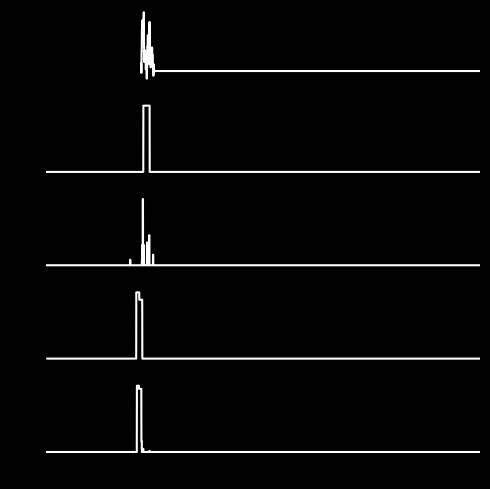

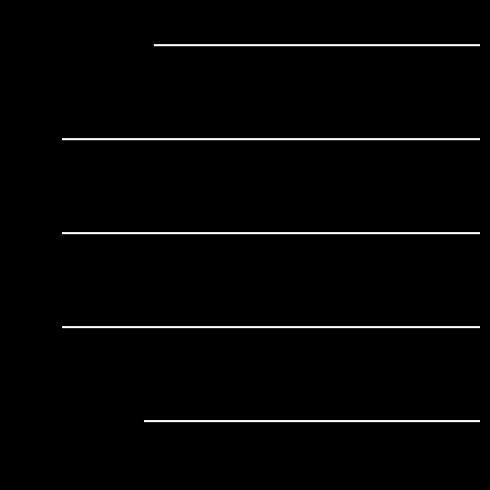

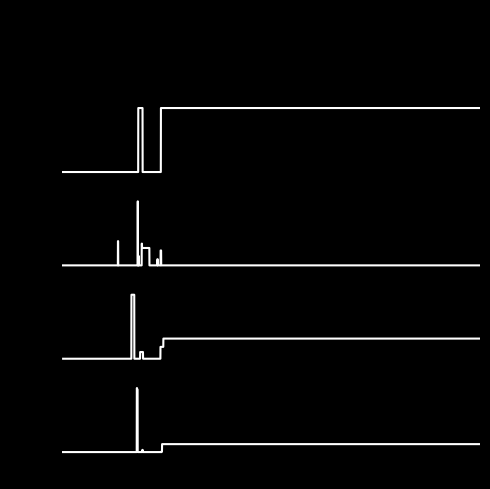

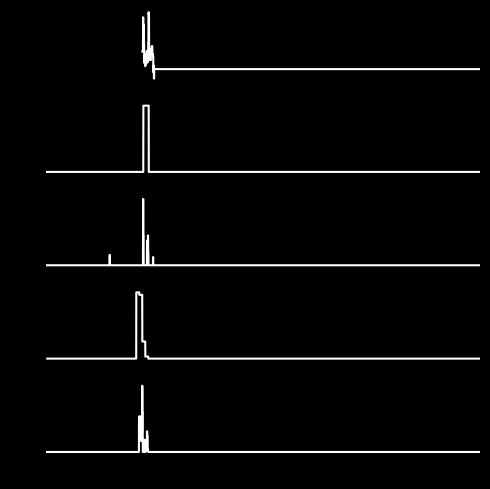

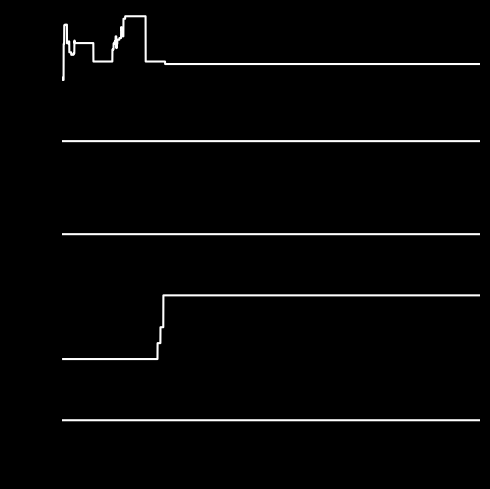

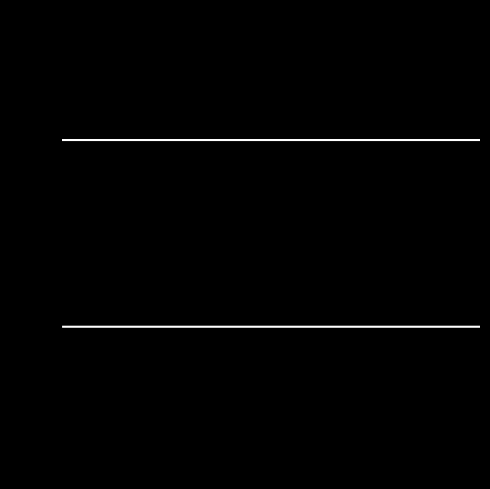

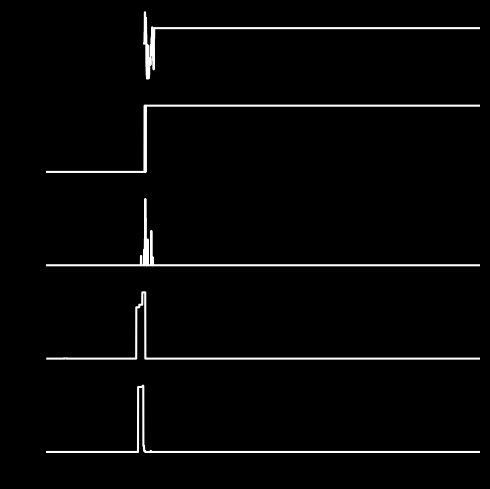

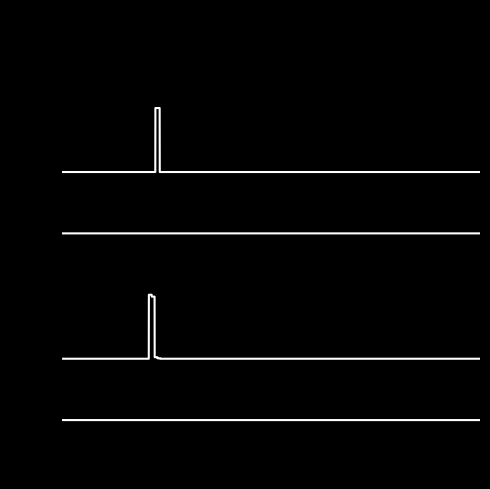

In [ ]:
%%time

channel_name = 'ch5_sleeptime'

# train test 데이터 합치기
a1 = train[['subject_id', 'lifelog_date']].copy()
a2 = test[['subject_id', 'lifelog_date']].copy()
val_df = pd.concat([a1,a2]).reset_index(drop=True)
print('# train:',len(train))
print('# test:',len(test))
print('# 전체 데이터:',len(val_df))

# 파일명
val_df = val_df[['subject_id', 'lifelog_date']].copy()
val_df['filename'] = val_df.apply(lambda x: f"user{x['subject_id']}_{x['lifelog_date']}_{channel_name}.png", axis=1)

# 만들어진 이미지
image_dir = f'{path}{channel_name}'
image_files = [f for f in os.listdir(image_dir) if f.endswith(f'_{channel_name}.png')]

# 남은 샘플
val_df = val_df.loc[~val_df['filename'].isin(image_files),:].reset_index(drop=True)
print('# 남은 샘플수:',len(val_df))

# ====================================
# 샘플 테스트
# ====================================
# rules = (
#   (val_df['subject_id']=='id01') & (val_df['lifelog_date'].isin(['2024-07-01']))
# )
# val_df = val_df.loc[rules,:].copy().head(1)

# 이미지 생성
bar = tqdm(range(val_df.shape[0]))
for idx in bar:
    user, date, *rest = val_df.iloc[idx].values
    bar.set_description(f'user: {user}, date: {date}')
    merged_data = merge_data_for_group(user, date)
    plot_time_series(merged_data, user, date, channel_name)